# Optimum Number of Clusters Prediction

Predicting the optimum number of clusters in 'Iris' dataset and represent it visually.

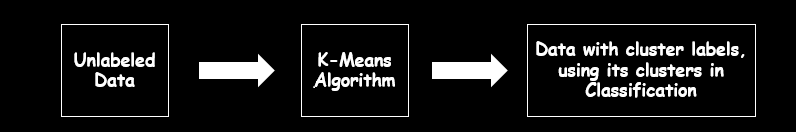

### Data Importing
First, we need to import our data _ _Iris dataset_ _ to our environment using scikit-learn library (datasets module).

In [1]:
# Import pandas for using DataFrame data structure & datasets from scikit-learn library for Iris dataset
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print('Data imported successfully!')

Data imported successfully!


### Data Exploration
We need to know more information about our dataset, so we use .head() and .info() methods of pandas object 'data'.

In [2]:
# view our first data observations
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# view meta-data about our dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Quantitative EDA (Descriptive Statistics)
We need some of statistics representing our dataset (statistics describe our dataset).

In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Find correlation between variables in our _Iris_ dataset

In [5]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### Graphical EDA 
We need visuals representing our dataset (we have 4 features but we can plotting using just 2 variables _we will use the first 2 feature variables only_).

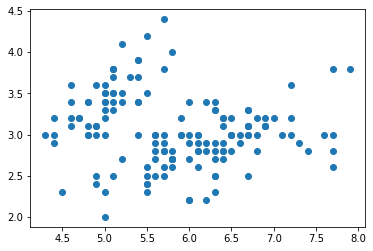

In [6]:
# Slice our Feature Variables data saving it as ndarray
X = iris_df.iloc[:, [0, 1, 2, 3]].values

# Import pyplot module under alias plt
import matplotlib.pyplot as plt

# Visualize our observations with sepal length on x-axis, sepal width on y-axis
plt.scatter(X[:, 0], X[:, 1])

#### Note that we have 4-dimensional feature space, so this visual not represent the whole story.

### Find the Optimum Number of Clusters for K-Means Classification

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


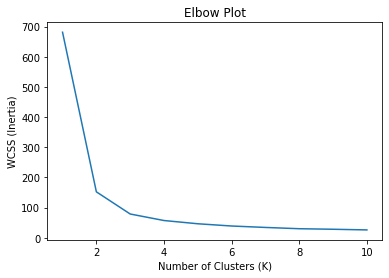

In [7]:
# Import KMeans object from sklearn.cluster module 
from sklearn.cluster import KMeans

# Initialize an empty array to store sum of squares within cluster for every k _number of clusters_ : wcss 
wcss = []

# try k from 1 to 11 clusters number in our dataset and calculate wcss _inertia_ for each to find optimum number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph which called 'Elbow Plot', 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)') # Within cluster sum of squares
plt.show()

#### You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

#### From this we choose the number of clusters as (K = 3).

### K-Means Classification 
After finding the optimal number of clusters in our _Iris_ dataset "Hyperparameter Tuning", we can use that model for Classification Task.
First, applying our kmeans model to our _Iris_ dataset.
Second, building our kmeans classifier.

In [8]:
# build our kmeans classifier with 3 clusters: kmeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# use our estimator with fitting then predicting on my features X : y_kmeans
y_kmeans = kmeans.fit_predict(X)

### Visualizing Results

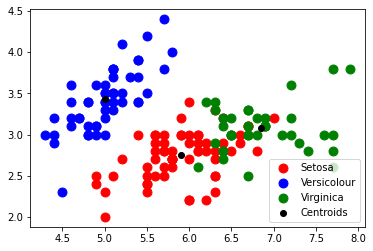

In [9]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 80, c = 'red', label = 'Setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 80, c = 'blue', label = 'Versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 80, c = 'green', label = 'Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            c = 'black', label = 'Centroids')

plt.legend()

#### If we split our data to training and testing set for predictive model evaluation in classification task on unseen data. 

### Model Evaluation on Classification Task
We will split our data to training set for clustering, and to testing set for classification task.

In [10]:
# Import our train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Setup our target variable
y = iris.target

# Split our dataset into training data and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit & Predict labels for our training data
y_train_pred = kmeans.fit_predict(X_train)

# Compute score on our clustering performance on training data
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.09166666666666666

#### We have so low score because of differences in labels encoding between the predicted labels variable & the actual labels variabel, so we need a mapping function to solve that.

In [11]:
# Remap for similar labels encoding
mapping_dict = {1:0,0:2,2:1}

# Import numpy under alias np
import numpy as np

# Apply mapping on our predicted 
y_train_pred = np.vectorize(mapping_dict.get)(y_train_pred)
accuracy_score(y_train, y_train_pred)

0.8833333333333333

#### We see here, that we have % 88.33 accuracy score for labeling observations in our training data. 

### Let's see classification on unseen data using cluster centers _ _our cluster defined previously_ _

In [12]:
# Fit & Predict labels for our testing data
y_test_pred = kmeans.predict(X_test)

# Compute score on our classifier performance on testing data, depending on clusters centers
from sklearn.metrics import accuracy_score
accuracy_score(y_test_pred, y_test)

0.1

#### We face the same problem again, need Mapping!

In [13]:
mapping_dict = {1:0,0:2,2:1}
y_test_pred = np.vectorize(mapping_dict.get)(y_test_pred)
accuracy_score(y_test, y_test_pred)

0.9

#### Finally, it's just a try for classification using clustering model. We can use supervised classification model after clustering for the classification task. But we should know all aspects of choosing which decision.